<a href="https://colab.research.google.com/github/bezerraluis/Analise-Exploratoria-de-dados-Medium/blob/master/Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypotheses

Some cities have higher properties prices;

Having animals impact on the prices ;

Houses with a higher condominium fee have a higher rent value;

Furnished houses have a higher rent value;

The number of parking spaces impact on rent value.

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Opening and Viewing the data

In [2]:
df_houses = pd.read_csv('/content/drive/My Drive/Todos os arquivos do pc antigo/datasets Kaggle/houses_to_rent_v2.csv')

#df_houses = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:

def missing_values(data):
    
    # Null total 
    missing_values = df_houses.isnull().sum()
    
    # Order nulls 
    total = missing_values.sort_values(ascending=True)
    
    # Percentage  
    percent = (missing_values / len(df_houses.index)*100).round(2).sort_values(ascending=True)

    table_missing = pd.concat([total, percent], axis=1, keys=['Number of Nulls', 'Percentagem of Nulls'])
  
    return table_missing.tail(10)


In [6]:
missing_values(df_houses)

,Number of Nulls,Percentagem of Nulls
bathroom,0,0.0
parking spaces,0,0.0
floor,0,0.0
animal,0,0.0
furniture,0,0.0
hoa (R$),0,0.0
rent amount (R$),0,0.0
property tax (R$),0,0.0
fire insurance (R$),0,0.0
total (R$),0,0.0


# Data Cleaning

With describe we can see many featrues have values to be Varified like area Max value 1000 too distante from the quartiles and fire insurance wiuit Max value 677. But we are goint to see each of them individualy.

In [7]:
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


The column city has no missing values, they are object and the values are all written correctly, it is ok to work with it 

I always use the method unique() to find any misplaced values


In [8]:
df_houses['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

First let's analyse the column area 

In [9]:
df_houses['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

We do not have a good distribution the points above 10.000 are skewing our data.

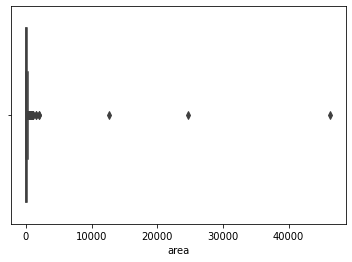

In [10]:
sns.boxplot(df_houses['area'])

We can see that the Max value is 46.335 and de min 11 our std is 537 the data is too dispersed.

In [11]:
df_houses['area'].unique()

array([   70,   320,    80,    51,    25,   376,    72,   213,   152,
          35,    26,    46,    36,    55,   100,   330,   110,    88,
          56,   600,    42,   160,    90,    49,    41,    64,   208,
          20,    32,    45,   350,    38,    30,    40,   300,   240,
         200,   360,   250,    48,   150,    60,    31,   210,   280,
          93,    75,   194,    65,   278,    61,   130,   164,   220,
         108,   128,    47,   170,    68,    63,   145,    85,   254,
         296,   133,    44,    22,    50,    67,   109,   400,   284,
         309,    73,   155,    58,    94,    76,   192,   217,    95,
         900,    34,    62,   180,   140,    52,   999,   270,    71,
         500,    96,   660,   107,   105,   287,    24,   154,   101,
         384,    57,    39,    78,    28,    83,   750,   258,   123,
         127,   219,   420,    59,   225,   480,    53,   121,    43,
         570,    89,   173,    91,   530,    87,   136,   308,   260,
         120,    33,

At first, I thought in remove areas below 20 m2. However, after some search, I found out many apartments between 11 and 20 m2

In [12]:
df_houses.query('area<20')





,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
332,Belo Horizonte,19,1,1,0,5,acept,not furnished,620,1100,85,15,1820
340,Belo Horizonte,15,1,1,0,3,not acept,furnished,0,1100,0,15,1115
356,São Paulo,15,1,1,0,-,not acept,furnished,0,2500,0,32,2532
412,São Paulo,16,1,1,0,1,not acept,not furnished,0,850,30,11,891
449,São Paulo,17,1,1,0,1,acept,not furnished,0,2700,5,35,2740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,São Paulo,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257
9996,São Paulo,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257
10164,Rio de Janeiro,15,1,1,0,4,not acept,not furnished,0,908,0,12,920
10425,Belo Horizonte,15,1,1,0,3,not acept,furnished,0,1100,0,15,1115


We have areas with 1.600 ,46.335 ,24.606 and son on , if we compare these values with the prices we can notice that a house in São Paulo with these size should be much higher than these values.

In [13]:
highier_1000 = df_houses.query('area >1000')
highier_1000.head(9)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
654,São Paulo,1600,6,6,6,-,acept,furnished,0,7600,1834,115,9549
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
2423,Belo Horizonte,1020,5,4,6,-,acept,furnished,0,6520,654,107,7281
3559,São Paulo,1100,4,6,10,-,acept,not furnished,3000,14000,2000,211,19210
4813,São Paulo,1600,4,5,12,-,acept,not furnished,1,6900,5000,104,12010
5129,Belo Horizonte,2000,4,2,3,-,acept,not furnished,0,4956,200,82,5238
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


We have 9 values that we are going to eliminate 

In [14]:
highier_1000.shape

(9, 13)

We are going to create a new data set with values from 1000 below 

In [15]:
df_houses = df_houses.query('area<=1000')

df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Now we have 10.683 data points 

In [16]:
df_houses.shape

(10683, 13)

Now we have a good distribution

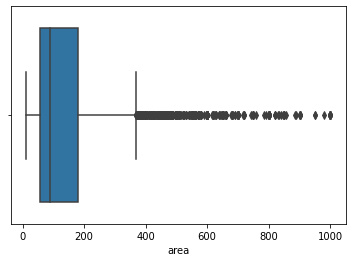

In [17]:
sns.boxplot(df_houses['area'])

Before we had a std of 537 and now 46 our data is less disperse 

In [18]:
df_houses['area'].describe()

count    10683.000000
mean       140.638865
std        129.829151
min         11.000000
25%         56.000000
50%         90.000000
75%        181.500000
max       1000.000000
Name: area, dtype: float64

Now the column room

In [19]:
df_houses['rooms'].describe()

count    10683.000000
mean         2.504634
std          1.170397
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64

This features looks like ok , std 1.17 ,quartiles between 1 and 3 , just max values is a little high 13 let's see it in depth.

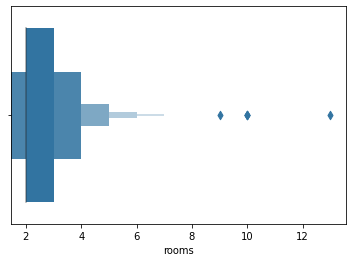

In [20]:
sns.boxenplot(df_houses['rooms'])

In [21]:
df_houses['rooms'].unique()

array([ 2,  4,  1,  3,  7,  5,  8,  6, 10, 13,  9])

I thought about changing rooms equal 1 because it is not commom here in country - side. However after some search I found out many One Room Apartments that is normal in Big cities.

In [22]:
check =df_houses.query('rooms==1')

check

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10661,Campinas,250,1,2,2,-,acept,not furnished,0,2200,602,34,2836
10668,São Paulo,24,1,1,0,-,acept,not furnished,0,870,0,14,884
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10677,São Paulo,38,1,1,0,19,not acept,not furnished,583,1000,46,13,1642


Now let's see more than 6 rooms and compare with area to find any wrong values, it looks like okay it would be weird properties with 60 m2 and 7 rooms.

In [23]:
rooms = df_houses.query('rooms >6 & area<150')

rooms

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
20,São Paulo,100,7,4,0,-,acept,not furnished,0,3800,118,58,3976
2867,Belo Horizonte,100,7,2,1,-,acept,not furnished,0,2800,28,46,2874


Now the column bathroom

In [24]:
df_houses['bathroom'].unique()

array([ 1,  4,  3,  2,  6,  5,  7,  9,  8, 10])

I want to filter properties with 1 bathroom and area more than 180 m2 to find some relation , because I know that properties with more than 100 m2 usually have more than 1 bathroom , that's my parameter to find some wrong datapoints.

In [25]:
filter_180 = df_houses.query('bathroom==1 & area>180')
filter_180

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
56,São Paulo,280,3,1,2,-,acept,not furnished,0,6000,113,91,6204
402,Campinas,181,2,1,2,-,acept,not furnished,0,1400,132,22,1554
743,São Paulo,197,3,1,2,-,acept,not furnished,0,2100,290,32,2422
907,Porto Alegre,230,4,1,1,3,acept,not furnished,1287,3500,370,52,5209
950,Campinas,212,4,1,2,-,acept,not furnished,0,1500,88,23,1611
1254,Belo Horizonte,184,3,1,2,1,acept,furnished,300,4000,110,54,4464
1518,São Paulo,206,2,1,3,-,acept,not furnished,0,3500,214,53,3767
1528,Belo Horizonte,250,4,1,8,-,acept,not furnished,0,2125,231,35,2391
2260,Belo Horizonte,200,4,1,2,4,acept,not furnished,345,2500,209,34,3088
2309,Belo Horizonte,360,3,1,3,-,acept,not furnished,0,1500,142,25,1667


I found some propertiers with 1 bathroom and more than 180 m2 , I 'm going to change this values with the mean.

Spliting bathroom equal 1 and area less and equal 100 because I do not want to change those values

In [26]:
test_menor100 =df_houses.query('bathroom==1 & area<=100')

test_menor100

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10677,São Paulo,38,1,1,0,19,not acept,not furnished,583,1000,46,13,1642
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926


The mean of the column Bathroom

In [27]:
media = df_houses['bathroom'].mean()
media

2.234952728634279

I m going to make a function to convert the datapoints equal 1 from the column bathroom 

In [28]:
def medias (valor):
    if valor == 1 :
      return round(df_houses['bathroom'].mean())
    else :
      return valor
    

I atributed bathroom equal 1 and area highier than 150 to test maior 

In [29]:
test_maior =df_houses.query('bathroom==1 & area>150')

test_maior.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
56,São Paulo,280,3,1,2,-,acept,not furnished,0,6000,113,91,6204
402,Campinas,181,2,1,2,-,acept,not furnished,0,1400,132,22,1554
425,São Paulo,160,3,1,2,-,acept,not furnished,0,5000,225,76,5301
696,São Paulo,180,3,1,0,-,acept,not furnished,0,2500,334,38,2872
743,São Paulo,197,3,1,2,-,acept,not furnished,0,2100,290,32,2422
907,Porto Alegre,230,4,1,1,3,acept,not furnished,1287,3500,370,52,5209
950,Campinas,212,4,1,2,-,acept,not furnished,0,1500,88,23,1611
1254,Belo Horizonte,184,3,1,2,1,acept,furnished,300,4000,110,54,4464
1382,Porto Alegre,169,2,1,1,-,acept,not furnished,0,2800,55,50,2905
1518,São Paulo,206,2,1,3,-,acept,not furnished,0,3500,214,53,3767


Now I am going to change the values equal 1 using the method apply and the function medias.

In [30]:
test_maior['bathroom'] = test_maior['bathroom'].apply(medias)

test_maior.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
56,São Paulo,280,3,2,2,-,acept,not furnished,0,6000,113,91,6204
402,Campinas,181,2,2,2,-,acept,not furnished,0,1400,132,22,1554
425,São Paulo,160,3,2,2,-,acept,not furnished,0,5000,225,76,5301
696,São Paulo,180,3,2,0,-,acept,not furnished,0,2500,334,38,2872
743,São Paulo,197,3,2,2,-,acept,not furnished,0,2100,290,32,2422
907,Porto Alegre,230,4,2,1,3,acept,not furnished,1287,3500,370,52,5209
950,Campinas,212,4,2,2,-,acept,not furnished,0,1500,88,23,1611
1254,Belo Horizonte,184,3,2,2,1,acept,furnished,300,4000,110,54,4464
1382,Porto Alegre,169,2,2,1,-,acept,not furnished,0,2800,55,50,2905
1518,São Paulo,206,2,2,3,-,acept,not furnished,0,3500,214,53,3767


In [31]:
print('test_menor',test_menor100.shape)

print('test_maior',test_maior.shape)

test_menor (4041, 13)
test_maior (81, 13)


Now I am going to concat test menor and test maior and create a dataframe with all values of bathroom equal 1 


In [32]:
df_houses_bath_1 = pd.concat([test_menor100,test_maior])

df_houses_bath_1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


In [33]:
df_houses_bath_1.shape

(4122, 13)

Now I need to select all data from bathroom different from 1 from our original dataframe and concat with df_houses_bath_1 to create a new dataframe adjusted.

In [34]:
df_houses_bath_diff_1 = df_houses.query('bathroom!=1')

df_houses_bath_diff_1.shape

(6382, 13)

We can see the new dataframe df_houses_2 where we do not have datapoints in bathroom equal 1 and area highier than 150 m2

In [35]:
df_houses_2 = pd.concat([df_houses_bath_1,df_houses_bath_diff_1])

df_houses_2.head(30)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
12,São Paulo,36,1,1,0,11,acept,not furnished,359,2100,70,27,2556
13,São Paulo,55,1,1,1,2,acept,furnished,790,4200,224,54,5268


In [36]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10504 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10504 non-null  object
 1   area                 10504 non-null  int64 
 2   rooms                10504 non-null  int64 
 3   bathroom             10504 non-null  int64 
 4   parking spaces       10504 non-null  int64 
 5   floor                10504 non-null  object
 6   animal               10504 non-null  object
 7   furniture            10504 non-null  object
 8   hoa (R$)             10504 non-null  int64 
 9   rent amount (R$)     10504 non-null  int64 
 10  property tax (R$)    10504 non-null  int64 
 11  fire insurance (R$)  10504 non-null  int64 
 12  total (R$)           10504 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Now the column parking spaces

In [37]:
df_houses_2['parking spaces'].describe()

count    10504.000000
mean         1.616432
std          1.589550
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: parking spaces, dtype: float64

In [38]:
df_houses_2['parking spaces'].unique()

array([ 1,  0,  2,  3,  4,  8,  5,  7,  6, 10])

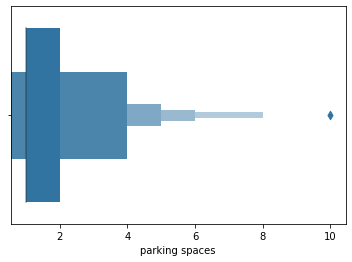

In [39]:
sns.boxenplot(df_houses_2['parking spaces'])

In [40]:
df_houses_2['parking spaces'].value_counts()

1     3562
0     2618
2     2034
3      959
4      784
5      229
6      161
8      123
7       33
10       1
Name: parking spaces, dtype: int64

In [41]:
#df_houses_2 = df_houses.query("parking space  fazer uma query para filtrar valors até no máximo 6 

Now we are going to solve the column floor

If we try to use describe we are goin to have a problem because we have the symbol " - " between our datapoints first we have to correct this.

In [42]:
df_houses_2['floor'].unique()

array(['7', '6', '2', '1', '10', '11', '8', '17', '-', '5', '3', '13',
       '4', '20', '15', '26', '14', '9', '27', '12', '23', '18', '16',
       '21', '25', '24', '19', '22', '32', '35', '46', '28', '29', '301',
       '51'], dtype=object)

We changed the name of the column floor to floors because it was a reserved word on python.

In [43]:
df_houses_2 = df_houses.rename(columns={'floor':'floors'})

df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


We are going to replace the synbol - by 0 because according to the author of the dataset this values are houses.

In [44]:
df_houses_2['floors'] = df_houses_2['floors'].replace('-','0')

In [45]:
df_houses_2['floors'].unique()

array(['7', '20', '6', '2', '1', '0', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [46]:
df_houses_2['floors'] = df_houses_2['floors'].astype(int)

In [47]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10683 non-null  object
 1   area                 10683 non-null  int64 
 2   rooms                10683 non-null  int64 
 3   bathroom             10683 non-null  int64 
 4   parking spaces       10683 non-null  int64 
 5   floors               10683 non-null  int64 
 6   animal               10683 non-null  object
 7   furniture            10683 non-null  object
 8   hoa (R$)             10683 non-null  int64 
 9   rent amount (R$)     10683 non-null  int64 
 10  property tax (R$)    10683 non-null  int64 
 11  fire insurance (R$)  10683 non-null  int64 
 12  total (R$)           10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


We can see the Max value is 301 and the Minimum is 1 we problably have a problem , most of our values are distributed between 1 to 8.

In [48]:
df_houses_2['floors'].describe()

count    10683.000000
mean         5.069643
std          6.069869
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        301.000000
Name: floors, dtype: float64

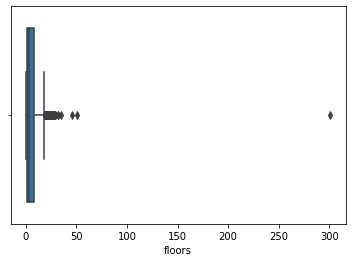

In [49]:
sns.boxplot(df_houses_2['floors'])

In [50]:
df_houses_2['floors'].unique()

array([  7,  20,   6,   2,   1,   0,   4,   3,  10,  11,  24,   9,   8,
        17,  18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,
        23,  35,  25,  46,  28,  29, 301,  51,  32])

In [51]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10683 non-null  object
 1   area                 10683 non-null  int64 
 2   rooms                10683 non-null  int64 
 3   bathroom             10683 non-null  int64 
 4   parking spaces       10683 non-null  int64 
 5   floors               10683 non-null  int64 
 6   animal               10683 non-null  object
 7   furniture            10683 non-null  object
 8   hoa (R$)             10683 non-null  int64 
 9   rent amount (R$)     10683 non-null  int64 
 10  property tax (R$)    10683 non-null  int64 
 11  fire insurance (R$)  10683 non-null  int64 
 12  total (R$)           10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


After some search I found ou that the highiest building in Brazil has 81 floor , so this is going to be our parameter. We can see that we only have 1 value higher than 81 probably some typo.

In [52]:
df_81 = (df_houses_2['floors']> 81).sum()

df_81

1

In [53]:
df_houses_2['floors'].value_counts()

0      2456
1      1081
2       984
3       930
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      302
12      256
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
46        1
35        1
Name: floors, dtype: int64

Now we are going to drop the value above 81 

In [54]:
df_houses_2 = df_houses_2.query('floors<81')

In [55]:
df_houses_2['floors'].unique()

array([ 7, 20,  6,  2,  1,  0,  4,  3, 10, 11, 24,  9,  8, 17, 18,  5, 13,
       15, 16, 14, 26, 12, 21, 19, 22, 27, 23, 35, 25, 46, 28, 29, 51, 32])

Now our distribution is better , most of our values are between 0 and 20. However , I am going to keep those values above because they can show us some important insight.

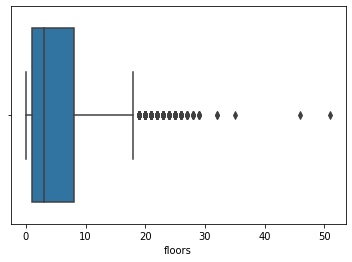

In [56]:
sns.boxplot(df_houses_2['floors'])

Now let's analyse the comlumn animal and furniture. It is a categorical value so we are going to look for some typos.

In [57]:
df_houses_2['animal'].unique()

array(['acept', 'not acept'], dtype=object)

In [58]:
df_houses_2['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

Let's analyze the  last 4 columns 

In [59]:
 df_houses_2[['hoa (R$)',	'rent amount (R$)',	'property tax (R$)'	,'fire insurance (R$)']]

,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,2065,3300,211,42
1,1200,4960,1750,63
2,1000,2800,0,41
3,270,1112,22,17
4,0,800,25,11
...,...,...,...,...
10687,402,1478,24,22
10688,3100,15000,973,191
10689,980,6000,332,78
10690,1585,12000,279,155


We have some suspect values on hoa(Homeowners association tax) and property tax(municipal property tax)  let's see them individually

In [60]:
 df_houses_2[['hoa (R$)',	'rent amount (R$)',	'property tax (R$)'	,'fire insurance (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
hoa (R$),10682.0,1174.122355,15599.561226,0.0,170.00,560.0,1236.75,1117000.0
rent amount (R$),10682.0,3893.737034,3407.669795,450.0,1529.25,2650.0,5000.00,45000.0
property tax (R$),10682.0,365.301442,3108.040362,0.0,38.00,125.0,375.00,313700.0
fire insurance (R$),10682.0,53.261000,47.748552,3.0,21.00,36.0,68.00,677.0


In [61]:
df_houses_2['hoa (R$)'].describe()

count    1.068200e+04
mean     1.174122e+03
std      1.559956e+04
min      0.000000e+00
25%      1.700000e+02
50%      5.600000e+02
75%      1.236750e+03
max      1.117000e+06
Name: hoa (R$), dtype: float64

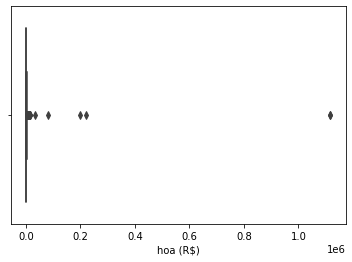

In [62]:
sns.boxplot(df_houses_2['hoa (R$)'])

In [63]:
df_houses_2['hoa (R$)'].value_counts()

0       2370
400      177
300      168
500      164
600      141
        ... 
1685       1
3756       1
187        1
171        1
1907       1
Name: hoa (R$), Length: 1679, dtype: int64

In [64]:
df_houses_2['hoa (R$)'] = df_houses_2.rename({'hoa (R$)':'hoa'},axis=1, inplace=True)

In [65]:
df_houses_2 = df_houses_2.drop('hoa (R$)',axis=1)

In [66]:
df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


We are no going to use values above 10000 because they are consider luxury condominium [luxury](https://www1.folha.uol.com.br/sobretudo/morar/2017/06/1891861-condominios-oferecem-servicos-exclusivos-e-chegam-a-custar-r-30-mil.shtml)

In [67]:
filter = df_houses_2.query('hoa <10000')

In [68]:
filter['hoa'].value_counts()

0       2370
400      177
300      168
500      164
600      141
        ... 
171        1
4265       1
2210       1
2178       1
1883       1
Name: hoa, Length: 1670, dtype: int64

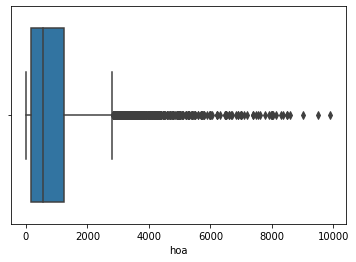

In [69]:
sns.boxplot(filter['hoa'])

We going to use the max value of 3000 , because after some search I found out the mean value for apartment in São Paulo is  1.718,07
 [hoa ,apartments](https://imoveis.estadao.com.br/noticias/jardins-e-moema-sao-os-bairros-com-condominios-mais-caros-de-sao-paulo/) and houses 	3,1 mil [Hoa,houses](https://exame.com/seu-dinheiro/quanto-custa-ter-uma-casa-de-condominio-em-12-capitais/)

In [70]:
cond = df_houses_2.query('hoa <=3000')

In [71]:
df_houses_2 = cond

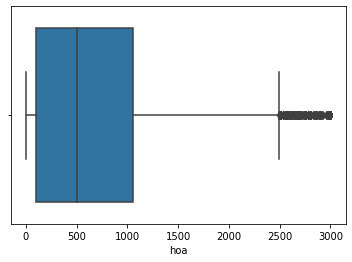

In [72]:
sns.boxplot(df_houses_2['hoa'])

In [73]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10097 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10097 non-null  object
 1   area                 10097 non-null  int64 
 2   rooms                10097 non-null  int64 
 3   bathroom             10097 non-null  int64 
 4   parking spaces       10097 non-null  int64 
 5   floors               10097 non-null  int64 
 6   animal               10097 non-null  object
 7   furniture            10097 non-null  object
 8   hoa                  10097 non-null  int64 
 9   rent amount (R$)     10097 non-null  int64 
 10  property tax (R$)    10097 non-null  int64 
 11  fire insurance (R$)  10097 non-null  int64 
 12  total (R$)           10097 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


Property Tax 

Our data is too disperse std 3458 and the max value 313700 is out of range.

In [74]:
df_houses_2['property tax (R$)'].describe()

count     10097.000000
mean        299.344756
std        3171.406208
min           0.000000
25%          34.000000
50%         114.000000
75%         317.000000
max      313700.000000
Name: property tax (R$), dtype: float64

We have a value next to 50000 and another next to 300000 biasing our data


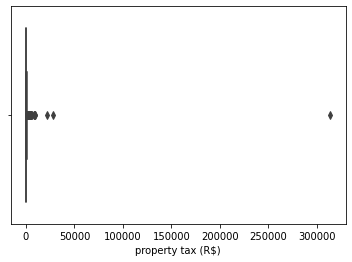

In [75]:
sns.boxplot(df_houses_2['property tax (R$)'])

In [76]:
df_houses_2['property tax (R$)'] = df_houses_2.rename({'property tax (R$)':'property'},axis=1, inplace=True)

In [77]:
df_houses_2 = df_houses_2.drop('property tax (R$)',axis=1)

In [78]:
df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


We are going to remove those values and use [Link](https://noticias.r7.com/sao-paulo/paulistano-paga-em-media-r-1398-de-iptu-residencial-diz-estudo-07112018)

In [79]:
filter2 = df_houses_2.query('property >=20000')

filter2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880,151,32040
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900


Let's remove just the value 313700 because a property of 42 m2 should not have a property tax of this value.

In [80]:
filter2['property'].unique()

array([ 21880,  28120, 313700])

In [81]:
df_houses_2 = df_houses_2.query('property != 313700')

Just to confirm we do not have this value anymore on our dataset

In [82]:
df_houses_2.query('property >300000')

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)


# Exploratory Data Analysis

Some cities have higher properties prices;

Having animals impact on the prices ;

Houses with a higher condominium fee have a higher rent value;

Furnished houses have a higher rent value;

The number of parking spaces impact on rent value.

In [83]:
df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Some cities have higher properties prices

We can notice that São Paulo , Rio de janeiro e Belo Horizonte have the highest rent values.

In [84]:
df_houses_2.groupby('city')['total (R$)'].median().sort_values(ascending = False)

city
São Paulo         4169.5
Rio de Janeiro    3161.5
Belo Horizonte    2979.0
Porto Alegre      2206.0
Campinas          2112.5
Name: total (R$), dtype: float64

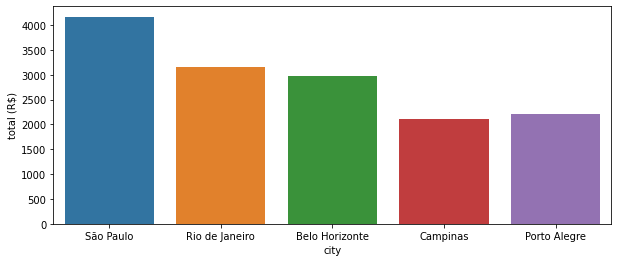

In [85]:
plt.figure(figsize=(10,4))
sns.barplot(x= df_houses_2['city'], y= df_houses_2['total (R$)'],ci= False,estimator= np.median,order=["São Paulo", "Rio de Janeiro","Belo Horizonte","Campinas","Porto Alegre"]);

If have animals impact on the prices

Yes , properties that accept animals are about 500 reais more expensive.

In [86]:
city = df_houses_2.groupby('animal')['rent amount (R$)']
display(city.agg(['mean', 'median']))

,mean,median
animal,,
acept,3702.986709,2560
not acept,3233.686922,2200


Analysing by city we can notice that not all cities have highier prices for animal owners as Rio de Janeiro and Porto Alegre.

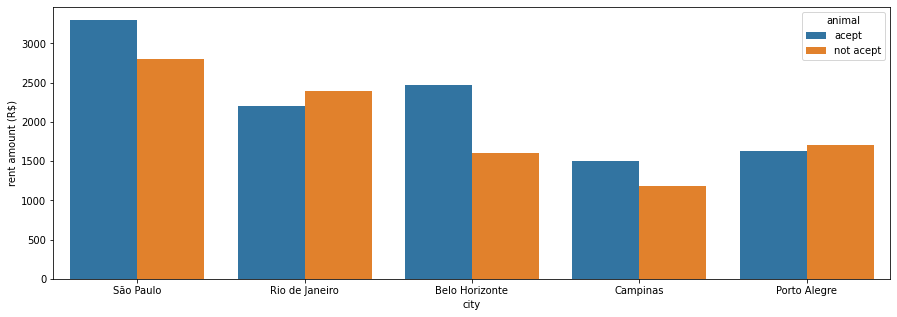

In [87]:
plt.figure(figsize= (15,5))
sns.barplot(x= df_houses_2['city'], y= df_houses_2['rent amount (R$)'],hue=df_houses_2['animal'],ci= False,estimator= np.median,order=["São Paulo", "Rio de Janeiro","Belo Horizonte","Campinas","Porto Alegre"]);

If properties with a higher condominium fee have a higher rent value

In [88]:
df_houses_2.groupby('city')['hoa'].mean().sort_values(ascending = False)

city
Rio de Janeiro    928.761708
São Paulo         799.031970
Campinas          578.347619
Belo Horizonte    507.782538
Porto Alegre      447.089301
Name: hoa, dtype: float64

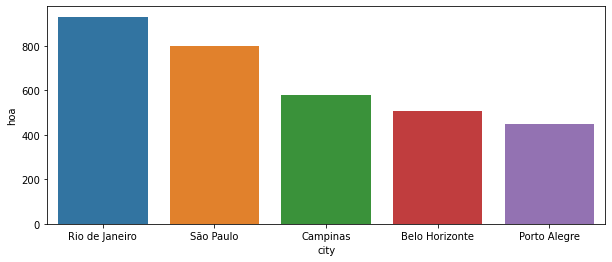

In [89]:
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'hoa',data= df_houses_2,ci=False,
            order= ('Rio de Janeiro','São Paulo','Campinas','Belo Horizonte','Porto Alegre'));

In [90]:
df_houses_2.groupby('city')['rent amount (R$)'].mean().sort_values(ascending = False)

city
São Paulo         4252.737546
Belo Horizonte    3567.354082
Rio de Janeiro    3010.212810
Porto Alegre      2303.133951
Campinas          2288.547619
Name: rent amount (R$), dtype: float64

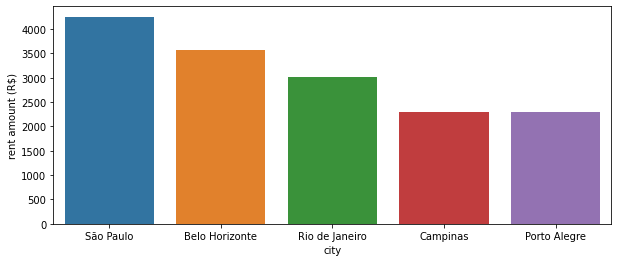

In [91]:
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'rent amount (R$)',ci= False,data= df_houses_2,order= ('São Paulo','Belo Horizonte','Rio de Janeiro','Campinas','Porto Alegre'));

There is no relation between comdominium fee and the value of rent, because the city with the top value of comdominum is Rio de Janeiro and the city with the highiest rent value is São Paulo.

If furnished houses have a higher rent value

In [92]:
df_houses_2.groupby('furniture')['rent amount (R$)'].mean().sort_values(ascending = False)

furniture
furnished        4540.124226
not furnished    3299.733220
Name: rent amount (R$), dtype: float64

<Figure size 1080x432 with 0 Axes>

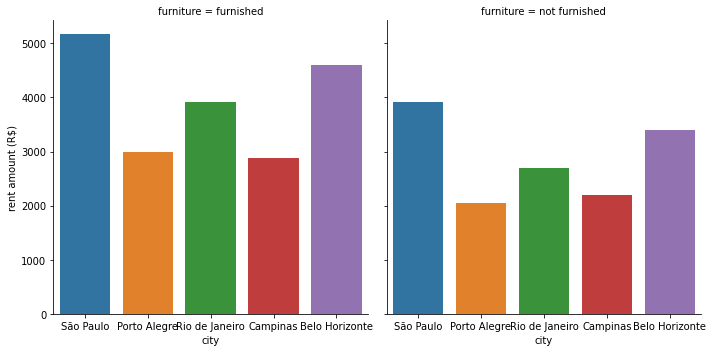

In [93]:
plt.figure(figsize=(15,6))
sns.catplot(x='city',y ='rent amount (R$)',col = 'furniture',kind= 'bar',ci= False,data= df_houses_2);

Yes , properties with furniture is more expensive to rent on average 1200 reais and the graphic shows that all cities have the same pattern.

If the number of  parking spaces impact on  rent value.

In [94]:
df_houses_2.groupby('parking spaces')['rent amount (R$)'].mean().sort_values(ascending = False)



parking spaces
7     9043.103448
8     8744.806723
6     8625.318182
5     7738.756098
4     7124.914336
3     6131.454982
2     4337.971371
10    3900.000000
1     2568.145949
0     2085.870238
Name: rent amount (R$), dtype: float64

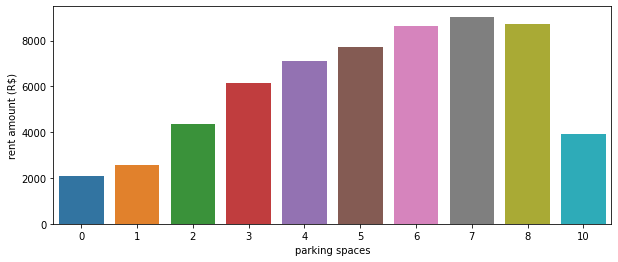

In [95]:
plt.figure(figsize=(10,4))
sns.barplot(x= 'parking spaces', y= 'rent amount (R$)', data= df_houses_2, ci= False)

Yes , from 0 to 7 the number of parking spaces impact on prices , just when we have 8 parking spaces the value is a little bit lower than 7 and 10 parking spaces is lower than 2 parking spaces.